In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import nltk 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [34]:
os.getcwd()

'C:\\Users\\MAVERICK\\OneDrive\\Desktop\\Deep Learning\\DATASET\\Spam classfication'

In [35]:
data=pd.read_csv('Spam_email.csv')

In [36]:
data

CATEGORY                                            MESSAGE  \
0            1  Dear Homeowner,\n\n \n\nInterest Rates are at ...   
1            1  ATTENTION: This is a MUST for ALL Computer Use...   
2            1  This is a multi-part message in MIME format.\n...   
3            1  IMPORTANT INFORMATION:\n\n\n\nThe new domain n...   
4            1  This is the bottom line.  If you can GIVE AWAY...   
...        ...                                                ...   
5791         0  I'm one of the 30,000 but it's not working ver...   
5792         0  Damien Morton quoted:\n\n>W3C approves HTML 4 ...   
5793         0  On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...   
5794         0  Once upon a time, Manfred wrote :\n\n\n\n> I w...   
5795         0  If you run Pick, and then use the "New FTOC" b...   

                                   FILE_NAME  
0     00249.5f45607c1bffe89f60ba1ec9f878039a  
1     00373.ebe8670ac56b04125c25100a36ab0510  
2     00214.1367039e50dc6b7adb0f2aa8aba83216  
3     00210.050ffd105bd4e006771ee63cabc59978  
4     00033.9babb58d9298daa2963d4f514193d7d6  
...                                      ...  
5791  00609.dd49926ce94a1ea328cce9b62825bc97  
5792  00957.e0b56b117f3ec5f85e432a9d2a47801f  
5793  01127.841233b48eceb74a825417d8d918abf8  
5794  01178.5c977dff972cd6eef64d4173b90307f0  
5795  00747.352d424267d36975a7b40b85ffd0885e  

[5796 rows x 3 columns]

In [37]:
data.drop('FILE_NAME',axis=1,inplace=True)

In [38]:
data.CATEGORY.value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [39]:
data

CATEGORY                                            MESSAGE
0            1  Dear Homeowner,\n\n \n\nInterest Rates are at ...
1            1  ATTENTION: This is a MUST for ALL Computer Use...
2            1  This is a multi-part message in MIME format.\n...
3            1  IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4            1  This is the bottom line.  If you can GIVE AWAY...
...        ...                                                ...
5791         0  I'm one of the 30,000 but it's not working ver...
5792         0  Damien Morton quoted:\n\n>W3C approves HTML 4 ...
5793         0  On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...
5794         0  Once upon a time, Manfred wrote :\n\n\n\n> I w...
5795         0  If you run Pick, and then use the "New FTOC" b...

[5796 rows x 2 columns]

In [40]:
for i in data.MESSAGE:
    print(i)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Craig, 



For the most part, 99% times 99% users agree on what is spam. This is the

nature of the spam problem. Now if you were to use a "personal trust"

system, you'd have a huge personal trust group that would include 99% of

the userbase. This means 99% times you'd be coming to the same conclusion,

only after burning several orders of magnitude more CPU cycles. That would

be stupid. Also, it would take several orders of magnitude longer to

bootstrap and reach effectiveness. Sub-optimal in the extreme.



As regards to the problems with the "gray" areas you mentioned, servers

recognize such content, and razor-agents can use this information to make

individual determination. Not to mention, users can set a local confidence

level they are confortable with.



cheers,

vipul.



On Thu, Aug 08, 2002 at 01:09:22PM -0700, Craig R . Hughes wrote:

> By system-trust vs personal trust I don't mean that the system doesn't

> have a trust rating for each user, but rather that each in

In [41]:
stopword = nltk.corpus.stopwords.words('english')


In [42]:
lemmatizer=WordNetLemmatizer()
corpus=[]
for i in range(len(data)):
    review=re.sub('[^a-zA-Z0-9]',' ',data['MESSAGE'][i]) # removing all the character other than alphabets
    review=review.lower()                  # Lowering all the cases 
    review=review.split()                  # spliting the sentence -> words for lemmatization
    review=[lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))] # removing stopwords
    review=' '.join(review)                # joining the words to rearrage to form the sent without stop words
    corpus.append(review)                  # Appending to corpus
print(corpus) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [43]:
corpus

['dear homeowner interest rate lowest point 40 year help find best rate situation matching need hundred lender home improvement refinance second mortgage home equity loan even le perfect credit service 100 free home owner new home buyer without obligation fill quick simple form jump start future plan today visit http 61 145 116 186 user0201 index asp afft qm10 unsubscribe please visit http 61 145 116 186 light watch asp',
 'attention must computer user new special package deal norton systemworks 2002 software suite professional edition includes six yes 6 feature packed utility 1 special low price software protect computer unwanted hazardous virus help secure private valuable information allow transfer file send e mail safely backup data quick easily improve pc performance w superior integral diagnostics 6 feature packed utility 1 great price 300 combined retail value 29 99 includes free shipping fall prey destructive virus hacker protect computer valuable information delay get copy tod

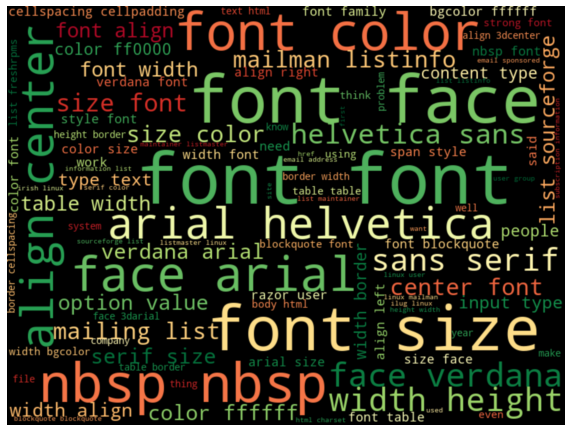

In [44]:
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 100,  
                       min_word_length = 4,
                       max_font_size = 100, 
                       background_color = 'black').generate(' '.join(corpus))


plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'quadric')
plt.axis('off')
plt.show()

# Model Modelling

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

## 1:Using Bag of Words

In [46]:
# Converting the Words to Vector using Bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500,ngram_range=(1,3)) # top 2500 features are taken 
X=cv.fit_transform(corpus).toarray()
y=data['CATEGORY']

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

## Naive Bayes Model

In [48]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [49]:
nb.fit(x_train,y_train)

MultinomialNB()

In [50]:
train_pred=nb.predict(x_train)

In [51]:
test_pred=nb.predict(x_test)

In [52]:
print(classification_report(train_pred,y_train))
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3664
           1       0.63      0.99      0.77       972

    accuracy                           0.88      4636
   macro avg       0.81      0.92      0.84      4636
weighted avg       0.92      0.88      0.89      4636

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       912
           1       0.64      0.98      0.78       248

    accuracy                           0.88      1160
   macro avg       0.82      0.92      0.85      1160
weighted avg       0.92      0.88      0.89      1160



## Random Forest Model

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc=RandomForestClassifier()

In [56]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
train_pred=rfc.predict(x_train)

In [58]:
test_pred=rfc.predict(x_test)

In [59]:
print(classification_report(train_pred,y_train))
print(classification_report(test_pred,y_test)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3119
           1       1.00      1.00      1.00      1517

    accuracy                           1.00      4636
   macro avg       1.00      1.00      1.00      4636
weighted avg       1.00      1.00      1.00      4636

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       779
           1       0.97      0.97      0.97       381

    accuracy                           0.98      1160
   macro avg       0.98      0.98      0.98      1160
weighted avg       0.98      0.98      0.98      1160



 Conclusion: Here we get a very good Model using 'Bag Of words' but Still the Semantic meaning will be missing So, to overcome this problem we are further going for TF-IDF Technique.

## 2:Using Term Frequency-Inverse Document Frequency

In [63]:
# Converting the Words to Vector using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
tf=TfidfVectorizer(ngram_range=(1,3),max_features=2500)
X=tf.fit_transform(corpus).toarray()

In [65]:
#tf.vocabulary_

{'dear': 852,
 'interest': 1353,
 'rate': 1830,
 'lowest': 1509,
 'point': 1770,
 '40': 300,
 'year': 2493,
 'help': 1219,
 'find': 1041,
 'best': 533,
 'situation': 2002,
 'need': 1640,
 'hundred': 1286,
 'home': 1230,
 'improvement': 1314,
 'second': 1931,
 'mortgage': 1598,
 'loan': 1495,
 'even': 960,
 'le': 1414,
 'credit': 821,
 'service': 1967,
 '100': 40,
 'free': 1127,
 'owner': 1713,
 'new': 1656,
 'without': 2455,
 'obligation': 1680,
 'fill': 1036,
 'quick': 1820,
 'simple': 1997,
 'form': 1119,
 'start': 2097,
 'future': 1147,
 'plan': 1761,
 'today': 2278,
 'visit': 2410,
 'http': 1256,
 '61': 334,
 'index': 1323,
 'asp': 481,
 'unsubscribe': 2359,
 'please': 1765,
 'watch': 2419,
 'must': 1614,
 'computer': 787,
 'user': 2374,
 'special': 2082,
 'package': 1716,
 'deal': 851,
 '2002': 80,
 'software': 2038,
 'suite': 2139,
 'professional': 1801,
 'includes': 1318,
 'six': 2003,
 'yes': 2496,
 'feature': 1016,
 'low': 1508,
 'price': 1790,
 'protect': 1807,
 'virus': 2409

In [66]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

### Naive Bayes model

In [67]:
nb.fit(x_train,y_train)

MultinomialNB()

In [68]:
train_pred=nb.predict(x_train)

In [69]:
test_pred=nb.predict(x_test)

In [70]:
print(classification_report(train_pred,y_train))
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3258
           1       0.89      0.98      0.94      1378

    accuracy                           0.96      4636
   macro avg       0.94      0.97      0.95      4636
weighted avg       0.96      0.96      0.96      4636

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       812
           1       0.91      0.99      0.94       348

    accuracy                           0.96      1160
   macro avg       0.95      0.97      0.96      1160
weighted avg       0.97      0.96      0.97      1160



### Randon forest model

In [72]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
train_pred=rfc.predict(x_train)

In [74]:
test_pred=rfc.predict(x_test)

In [75]:
print(classification_report(train_pred,y_train))
print(classification_report(test_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3119
           1       1.00      1.00      1.00      1517

    accuracy                           1.00      4636
   macro avg       1.00      1.00      1.00      4636
weighted avg       1.00      1.00      1.00      4636

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       783
           1       0.97      0.98      0.98       377

    accuracy                           0.98      1160
   macro avg       0.98      0.98      0.98      1160
weighted avg       0.98      0.98      0.98      1160



.

Conclusion: So, by using the algorithm as Random Forest Classifier we are getting a very good model having a Good Precison,Recall and Accuracy So, we can Conclude that the 'CATEGORY' and the 'MESSAGE' are very much properly grouped.

### Checking if the Model is Good or not.

In [96]:
print('Test 1')
test1 = ["""U won 10 crore,please give your account details,So that we can transfer the money"""]
test_vec = tf.transform(test1)
print('The CATEGORY is :',nb.predict(test_vec))

Test 1
The CATEGORY is : [1]


In [102]:
print('Test 2')
test2 = ["""hey Ram,how are you,hope you are doing great"""]
test_vec = tf.transform(test2)
print('The CATEGORY is :',nb.predict(test_vec))

Test 2
The CATEGORY is : [0]


In [105]:
print('Test 3')
test3 = ["""Get Cashback of Upto Rs.50000* and 40% Cashback* on Fuel Spends. Apply for IndianOil Axis Bank Credit Card Now!"""]
test_vec = tf.transform(test3)
print('The CATEGORY is :',nb.predict(test_vec))

Test 3
The CATEGORY is : [1]


## Hence,Predicted Rating with respect to Category  are Accurate as per the test results.